In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from tqdm import tqdm

from matplotlib_venn import venn3

In [2]:
import sys
sys.path.append('../../code')

from splits import get_lo_split, set_cluster_columns, get_nearest_mols, select_distinct_clusters

In [3]:
kdr = pd.read_csv('../../data/raw/kdr_lo.csv', index_col=0)
kdr

,smiles,value
0,Brc1ccc(-c2nc3ccc(Nc4ccnc5ccccc45)cc3[nH]2)cc1,6.742321
1,Brc1ccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)cc1,6.419075
2,C#CC(C)OC1=CC(=O)C(Nc2ncnc3cc(OCCCN4CCCC4)c(OC...,7.432974
3,C#CC(OC1=CC(=O)C(Nc2ncnc3cc(OCCCN4CCCC4)c(OC)c...,8.108191
4,C#CCO/N=C/c1c(N)ncnc1Oc1ccc2[nH]c(C)cc2c1F,7.275724
...,...,...
4890,c1cn(Cc2ccc3c(c2)-c2[nH]nc(-c4ccsc4)c2C3)cn1,6.680695
4891,c1cnc(CCc2ccncc2)c(-c2nnc(NCc3ccc4c(c3)OCO4)o2)c1,6.800804
4892,c1cnc(CCc2ccncc2)c(-c2nnc(Nc3cnc4ccccc4c3)o2)c1,6.419075
4893,c1cncc(-c2cnn3cc(-c4ccc(OCCN5CCCCC5)cc4)cnc23)c1,7.677781


In [13]:
splits = []

smiles = np.array(kdr['smiles'].to_list())
values = np.array(kdr['value'].to_list())

for i in tqdm(range(3)):
    idx = np.arange(len(smiles))
    np.random.seed(i)
    np.random.shuffle(idx)

    shuffled_smiles = smiles[idx]
    shuffled_values = values[idx]

    cluster_smiles, train_smiles = select_distinct_clusters(shuffled_smiles, 0.4, 5, 130, shuffled_values, 0.70)
    train_size = 500 - len(cluster_smiles)
    train_smiles = list(train_smiles)[:train_size]
    # Move one molecule from each test cluster to the train
    leave_one_clusters = []
    for cluster in cluster_smiles:
        train_smiles.append(cluster[-1])
        leave_one_clusters.append(cluster[:-1])
    split = set_cluster_columns(kdr, leave_one_clusters, train_smiles)
    splits.append(split)

100%|██████████| 3/3 [05:49<00:00, 116.53s/it]


In [14]:
splits[2]

,smiles,value,cluster
1,Brc1ccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)cc1,6.419075,52
4,C#CCO/N=C/c1c(N)ncnc1Oc1ccc2[nH]c(C)cc2c1F,7.275724,0
15,C(#Cc1cc(-c2n[nH]c3c2Cc2ccccc2-3)cs1)COc1ccccc1,5.329661,0
18,C/C(=N\O)c1ccc2[nH]c3c4c(c5c(c3c2c1)CNC5=O)-c1...,8.698970,0
20,C/C(=N\OC(C)C)c1ccc2[nH]c3c4c(c5c(c3c2c1)CNC5=...,8.349485,0
...,...,...,...
4884,c1ccc2c(-c3nc4cc(N5CCOCC5)ccc4[nH]3)[nH]nc2c1,6.793174,48
4886,c1ccc2c(c1)c(-c1cncc(-c3ccsc3)c1)cn2CCCN1CCCCC1,7.408935,0
4887,c1ccc2c(c1)c(-c1cncc(-c3ccsc3)c1)cn2CCN1CCCCC1,6.950782,0
4888,c1ccc2c(c1)c(-c1cncc(-c3ccsc3)c1)cn2CCN1CCOCC1,7.214670,0


In [15]:
sum([len(x) for x in leave_one_clusters])

417

(array([1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 2., 4., 3., 1., 2., 2., 0., 6., 2., 3., 1., 0., 1., 2., 1.,
        4., 0., 2., 2., 1., 1., 2., 0., 1., 1., 0., 0., 2., 0., 0., 2.]),
 array([0.33794748, 0.35787203, 0.37779658, 0.39772113, 0.41764569,
        0.43757024, 0.45749479, 0.47741934, 0.49734389, 0.51726844,
        0.53719299, 0.55711754, 0.57704209, 0.59696664, 0.61689119,
        0.63681575, 0.6567403 , 0.67666485, 0.6965894 , 0.71651395,
        0.7364385 , 0.75636305, 0.7762876 , 0.79621215, 0.8161367 ,
        0.83606126, 0.85598581, 0.87591036, 0.89583491, 0.91575946,
        0.93568401, 0.95560856, 0.97553311, 0.99545766, 1.01538221,
        1.03530676, 1.05523132, 1.07515587, 1.09508042, 1.11500497,
        1.13492952, 1.15485407, 1.17477862, 1.19470317, 1.21462772,
        1.23455227, 1.25447683, 1.27440138, 1.29432593, 1.31425048,
        1.33417503]),
 <BarContainer object of 50 artists>)

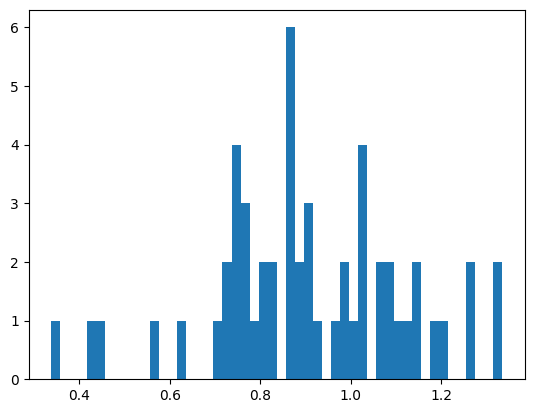

In [16]:
per_cluster_std = []
for i in range(split['cluster'].max()):
    cluster = split[split['cluster'] == i]
    std = cluster['value'].std()
    per_cluster_std.append(std)
plt.hist(per_cluster_std, bins=50)

In [17]:
data = splits[0]
test_0 = data[data['cluster'] != 0]['smiles'].to_list()

data = splits[1]
test_1 = data[data['cluster'] != 0]['smiles'].to_list()

data = splits[2]
test_2 = data[data['cluster'] != 0]['smiles'].to_list()

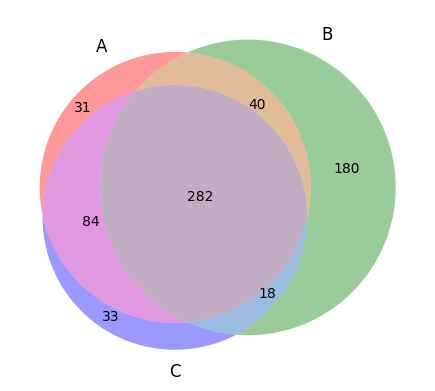

In [18]:
venn3([
    set(test_0),
    set(test_1),
    set(test_2),
])

In [19]:
data = splits[0]
is_train = data['cluster'] == 0
train_0 = data[is_train].reset_index(drop=True)
train_0.to_csv('../../data/lo/kdr/train_1.csv')
test_0 = data[~is_train].reset_index(drop=True)
test_0.to_csv('../../data/lo/kdr/test_1.csv')

In [20]:
train_0

,smiles,value,cluster
0,C/C(=N\OC(C)C)c1ccc2c(c1)c1c3c(c4c(c1n2CC(C)C)...,7.897940,0
1,C/C(=N\OCC(C)C)c1ccc2[nH]c3c4c(c5c(c3c2c1)CNC5...,8.129819,0
2,C=CC(=O)Nc1cc2c(Nc3c(F)cc(Br)cc3F)ncnc2cc1OCC1...,6.826814,0
3,C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Br)cc3F)ncnc2cc1OCC...,6.376751,0
4,C=CC(=O)Nc1cc2c(Nc3cc(Cl)c(Cl)cc3Cl)ncnc2cc1OC...,6.102373,0
...,...,...,...
495,c1ccc(-c2ccc(Nc3nnc(-c4cccnc4CCc4ccncc4)o3)cc2...,5.579879,0
496,c1ccc(Nc2ncc3c(n2)-c2ccccc2SC3)cc1,5.086133,0
497,c1ccc(Oc2ccc(Nc3ncnc4ccccc34)cc2)cc1,5.565271,0
498,c1ccc2c(c1)c(-c1cncc(-c3ccsc3)c1)cn2CCN1CCOCC1,7.214670,0


In [21]:
test_0['cluster'].unique().shape

(54,)

In [22]:
data = splits[1]
is_train = data['cluster'] == 0
train_1 = data[is_train].reset_index(drop=True)
train_1.to_csv('../../data/lo/kdr/train_2.csv')
test_1 = data[~is_train].reset_index(drop=True)
test_1.to_csv('../../data/lo/kdr/test_2.csv')

In [23]:
data = splits[2]
is_train = data['cluster'] == 0
train_2 = data[is_train].reset_index(drop=True)
train_2.to_csv('../../data/lo/kdr/train_3.csv')
test_2 = data[~is_train].reset_index(drop=True)
test_2.to_csv('../../data/lo/kdr/test_3.csv')

# t-SNE

In [24]:
mols = [Chem.MolFromSmiles(smile) for smile in data['smiles']]
fps = [AllChem.GetMorganFingerprintAsBitVect(x, 2, 1024) for x in mols]

In [25]:
fps_np = []
for f in fps:
    fps_np.append(np.array(f))
fps_np = np.array(fps_np)

In [26]:
from sklearn import manifold

sr_tsne = manifold.TSNE(n_components=2, perplexity=40, random_state=0).fit_transform(
    fps_np
)

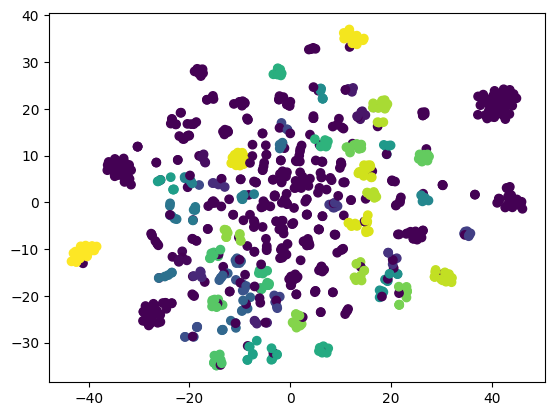

In [27]:
plt.scatter(sr_tsne[:, 0], sr_tsne[:, 1], c=data['cluster'])

# Tests

In [30]:
# Ensure that for each test cluster there is only one similar molecule in the train
data = splits[2]
is_train = data['cluster'] == 0
train_smiles = data[is_train]['smiles'].to_list()

for i in data['cluster'].unique():
    if i == 0:
        continue
    is_in_cluster = data['cluster'] == i
    cluster = data[is_in_cluster]
    cluster_smiles = cluster['smiles'].to_list()
    nearest_sim = get_nearest_mols(train_smiles, cluster_smiles)
    nearest_sim = np.array(nearest_sim)
    is_too_close = nearest_sim > 0.4
    assert is_too_close.sum() == 1 

In [21]:
cluster

,smiles,value,cluster
1,Brc1ccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)cc1,6.419075,51
867,CCc1ccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)cc1,5.060930,51
3147,Cc1ccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)cc1,5.322302,51
3390,Cc1cccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)c1,5.182369,51
3560,Cc1ccccc1-c1nc2ccc(Nc3ncnc4ccccc34)cc2[nH]1,5.029142,51
3738,Clc1cc(Cl)cc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]...,5.734946,51
3742,Clc1ccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)cc1,7.040959,51
3743,Clc1ccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)cc1Cl,6.118615,51
3762,Clc1cccc(-c2nc3ccc(Nc4ncnc5ccccc45)cc3[nH]2)c1,5.801068,51
3764,Clc1ccccc1-c1nc2ccc(Nc3ncnc4ccccc34)cc2[nH]1,5.060431,51


In [23]:
sum(is_too_close)

0